In [15]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint

In [16]:
mpl.get_backend()

'nbAgg'

In [3]:
# plt.plot?

<IPython.core.display.Javascript object>


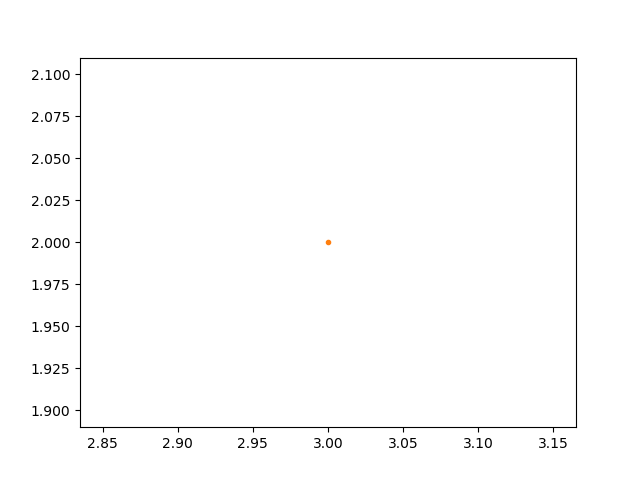

In [17]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)

plt.plot(3, 2)

In [18]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'

plt.plot(3, 2, '.')

In [7]:
#Behind the scene

# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111) #111 means we just want one plot #return value axes object

# plot the point (3,2)
ax.plot(3, 2, '.') #that's how it works

# save the figure to test.png
canvas.print_png('test.png')

In [8]:
%%html

<img src = 'test.png'/>

<IPython.core.display.Javascript object>


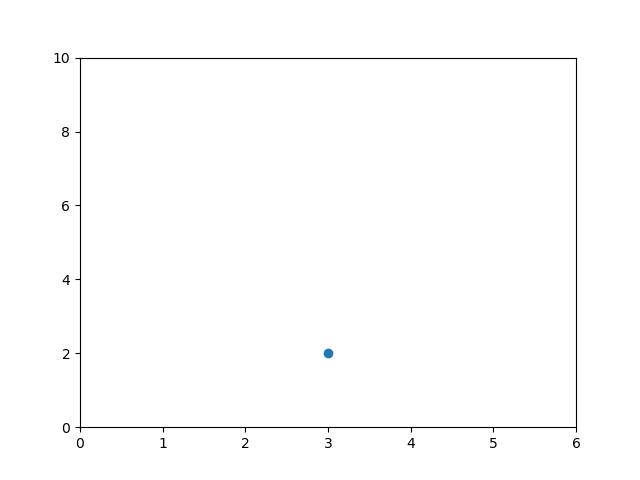

[0, 6, 0, 10]

In [9]:
# create a new figure
plt.figure()
plt.plot(3, 2, 'o')

ax = plt.gca()
ax.axis([0, 6, 0, 10])

<IPython.core.display.Javascript object>


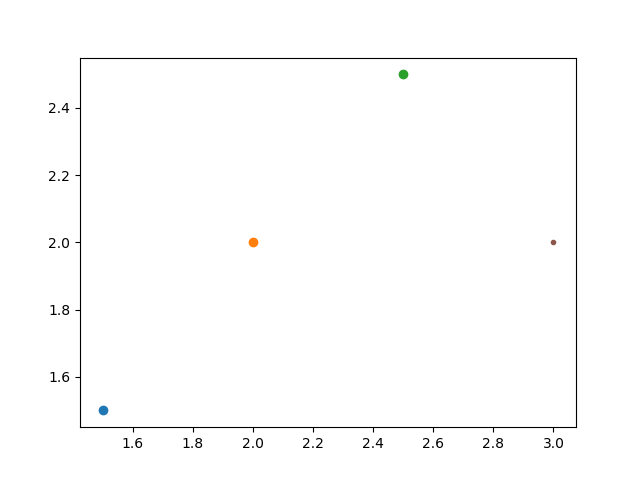

In [10]:
plt.figure()

plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, 'o')
plt.plot(2.5, 2.5, 'o')

In [11]:
ax = plt.gca()

# get all the child objects the axes contains (lines, spines, axis, text, rectangle)
ax.get_children() #all of the objects that child contains

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

<IPython.core.display.Javascript object>


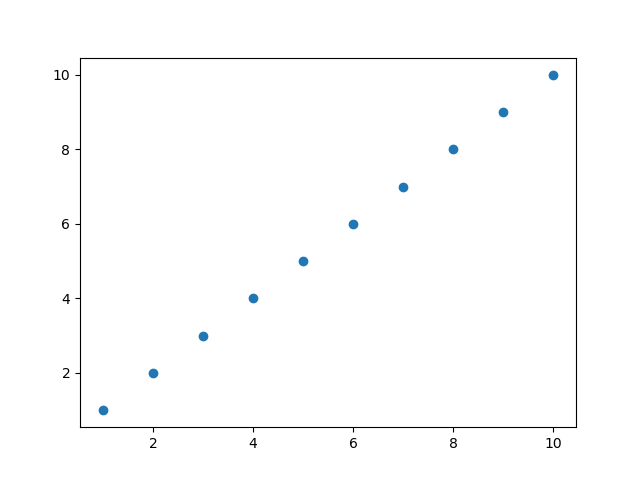

In [20]:
x = np.array(range(1, 11))

y = x

plt.figure()
plt.scatter(x, y)

<IPython.core.display.Javascript object>


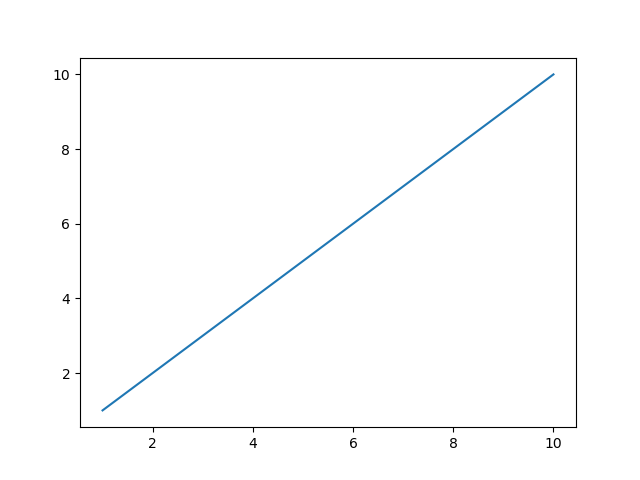

In [31]:
x = np.array(range(1, 11))

y = x

colors = ['green'] * (len(x)-1)
colors.append('red')

plt.figure()
plt.scatter(x, y, s = 100, c = colors) #s = size of data points
# plt.plot(x, y)

In [21]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

list(zip_generator)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [22]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10]) #zip is a generator

x, y = zip(*zip_generator)

print(x)
print(y)
type(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


tuple

<IPython.core.display.Javascript object>


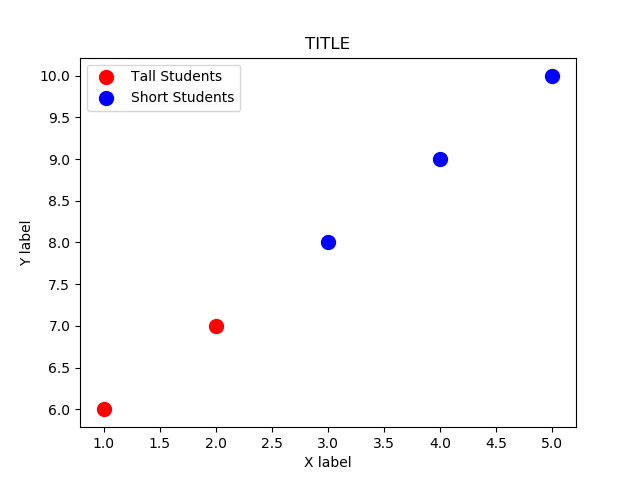

In [23]:
plt.figure()
plt.scatter(x[:2], y[:2], s = 100, c = 'red', label = 'Tall Students')
plt.scatter(x[2:], y[2:], s = 100, c = 'blue', label = 'Short Students')

In [26]:
plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("TITLE")

Text(0.5, 1, 'TITLE')

In [25]:
plt.legend() #legend itselt is an artist which means it contains children

In [28]:
plt.legend(loc = 4, frameon = False, title = 'Legend')

In [19]:
plt.gca().get_children()

 Text(0.5, 1.0, 'TITLE'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [20]:
legend = plt.gca().get_children()[-2]
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [29]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

#????????????????

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall Students')
                        Text(0, 0, 'Short Students')
    FancyBboxPatch((0, 0), width=1, height=1)


<IPython.core.display.Javascript object>


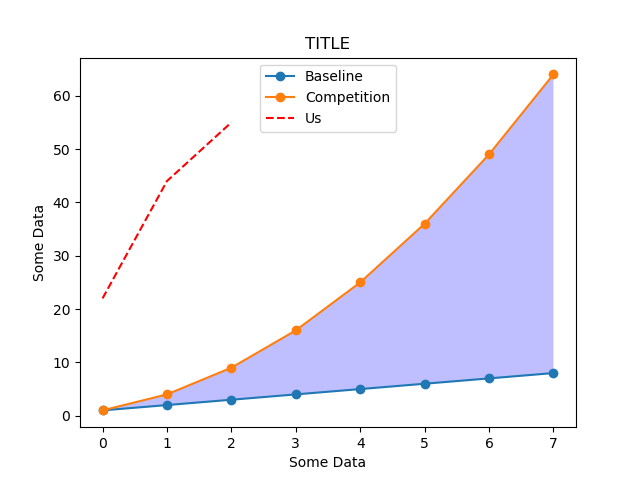

In [51]:
linear_data = np.array(range(1, 9))
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')

In [52]:
plt.plot([22, 44, 55], '--r')

In [53]:
plt.xlabel("Some Data")
plt.ylabel("Some Data")
plt.title("TITLE")
plt.legend(['Baseline', 'Competition', 'Us'])

In [54]:
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, quadratic_data, 
                      facecolor = 'blue',
                      alpha = .25)

<IPython.core.display.Javascript object>


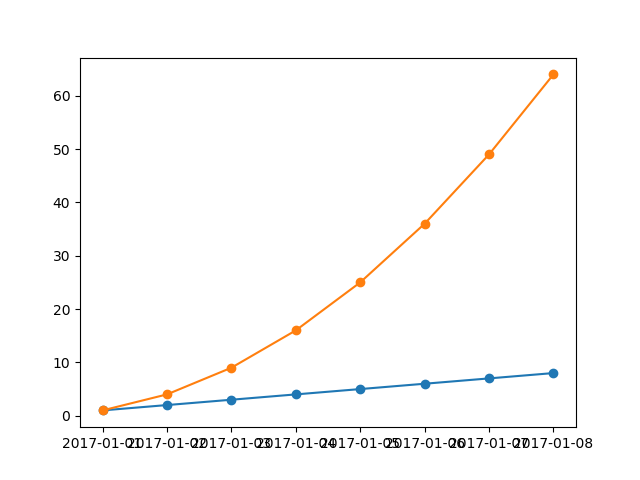

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [55]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')

plt.plot(observation_dates, linear_data, '-o', 
        observation_dates, quadratic_data, '-o')

<IPython.core.display.Javascript object>


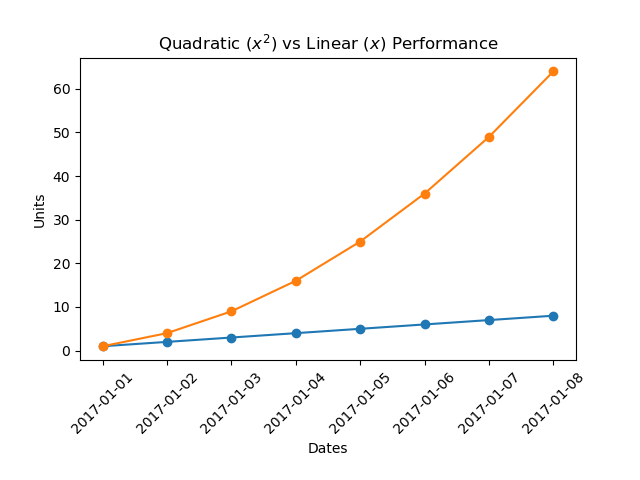

In [62]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))

plt.plot(observation_dates, linear_data, '-o', 
        observation_dates, quadratic_data, '-o')

In [63]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)


In [64]:
plt.subplots_adjust(bottom = .25)

In [65]:
ax = plt.gca()
ax.set_xlabel('Dates')
ax.set_ylabel('Units')
ax.set_title("Quadratic ($x^2$) vs Linear ($x$) Performance")

# plt.tight_layout()

Text(0.5, 1, 'Quadratic ($x^2$) vs Linear ($x$) Performance')

<IPython.core.display.Javascript object>


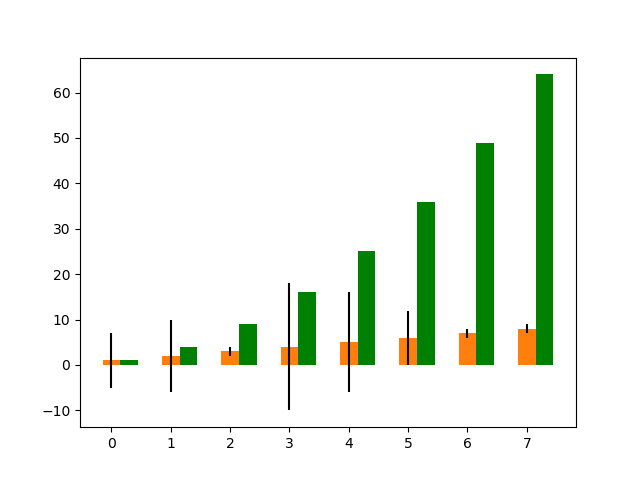

<BarContainer object of 8 artists>

In [66]:
plt.figure()

xvals = range(len(linear_data))

plt.bar(xvals, linear_data, width = .3)

In [67]:
new = []

for item in xvals:
    new.append(item+.3)
    
plt.bar(new, quadratic_data, width = .3, color = 'green')

<BarContainer object of 8 artists>

In [68]:
linear_err = [randint(0, 15) for x in range(len(linear_data))]

plt.bar(xvals, linear_data, width = .3, yerr = linear_err) #error bar

<BarContainer object of 8 artists>

<IPython.core.display.Javascript object>


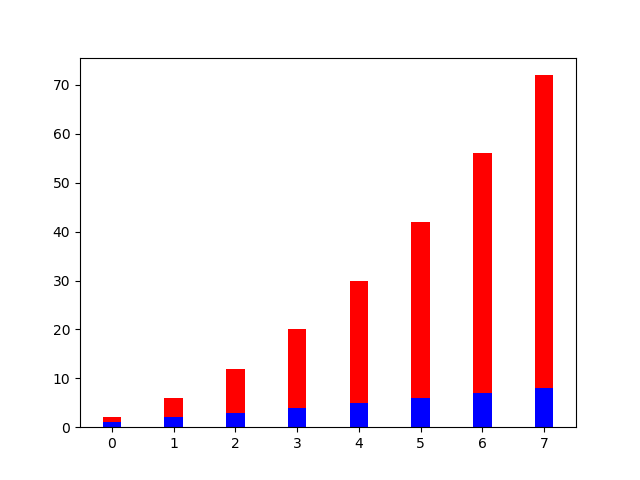

<BarContainer object of 8 artists>

In [71]:
plt.figure()

xvals = range(len(linear_data))

plt.bar(xvals, linear_data, width = .3, color = 'b')
plt.bar(xvals, quadratic_data, width = .3, bottom = linear_data, color = 'r')

<IPython.core.display.Javascript object>


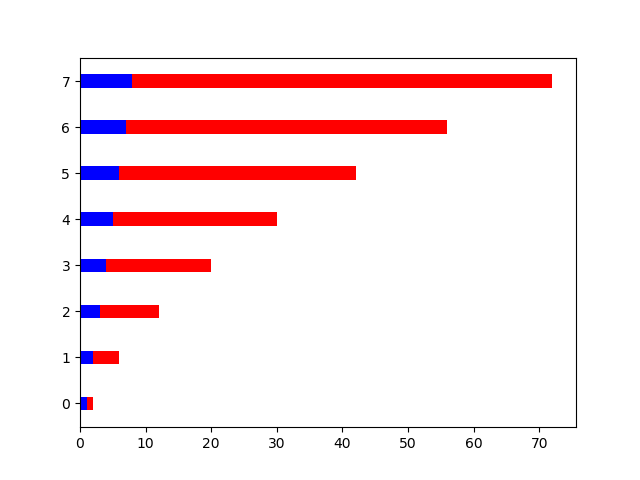

<BarContainer object of 8 artists>

In [72]:
plt.figure()

xvals = range(len(linear_data))

plt.barh(xvals, linear_data, height = .3, color = 'b')
plt.barh(xvals, quadratic_data, height = .3, left = linear_data, color = 'r')

<IPython.core.display.Javascript object>


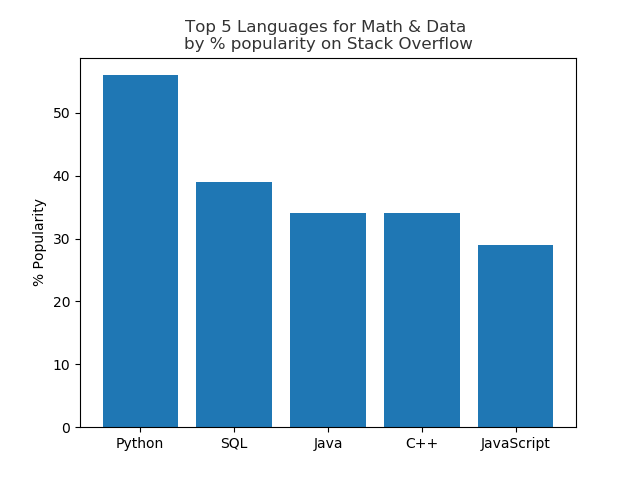

In [103]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

plt.show()

<IPython.core.display.Javascript object>


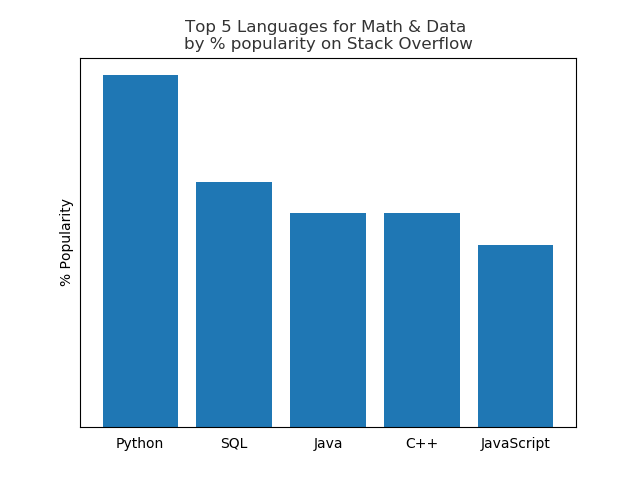

In [92]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top = None, bottom = None, left = None, right = None, labelleft = None, labelbottom = 'on')

plt.show()

<IPython.core.display.Javascript object>


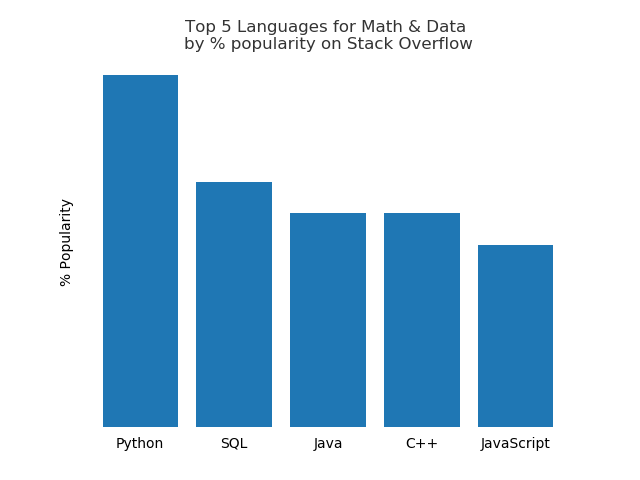

In [96]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top = None, bottom = None, left = None, right = None, labelleft = None, labelbottom = 'on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

<IPython.core.display.Javascript object>


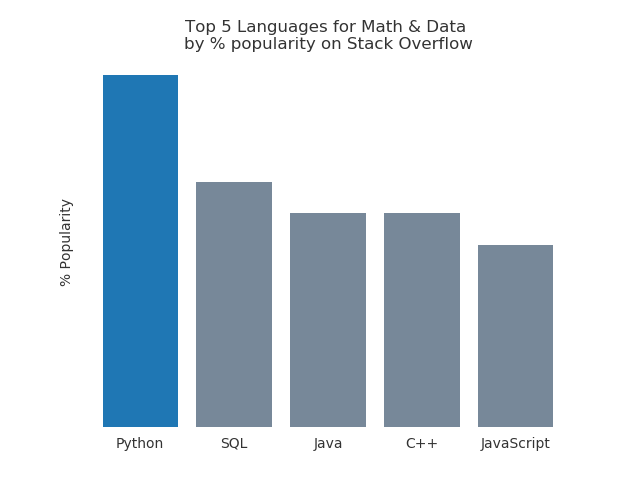

In [107]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top = None, bottom = None, left = None, right = None, labelleft = None, labelbottom = 'on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

<IPython.core.display.Javascript object>


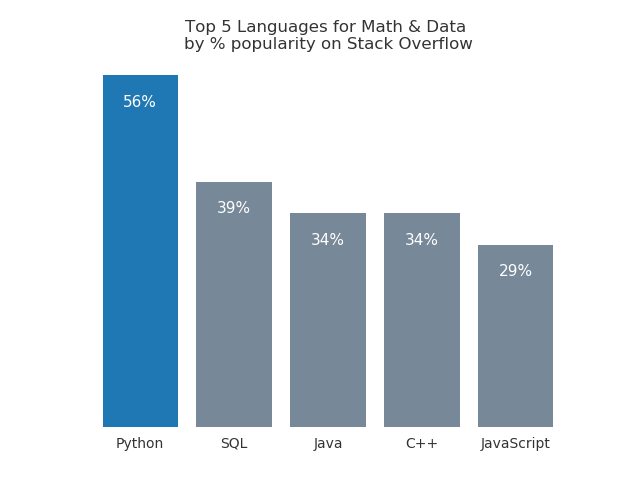

In [102]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')

# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)

# # remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# # remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top = None, bottom = None, left = None, right = None, labelleft = None, labelbottom = 'on')

# # remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# # direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
    
plt.show()